$$\require{mhchem}$$       

# Homework 6
# Pengfei Cheng
# AndrewID: pengfeic

# Problem 1

## Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# import packages

In [2]:
def tH(t):
    return np.array([t, t ** 2 / 2, t ** 3 / 3, t ** 4 / 4, -1/t, 1, 0, -1]).T

def tS(t):
    return np.array([np.log(t), t, t ** 2 / 2, t ** 3 / 3, - 1 / (2 * t ** 2), 0, 1, 0]).T

# define functions for Shomate equations

In [39]:
# input Shomate Parameters

species = ['CO', 'O2', 'H2', 'CO2', 'H2O', 'CH4', 'CH2O', 'C2H2']

Hf298 = np.array([-110.53, 0, 0, -393.51, -241.826, -74.87, -115.90, 226.73]).T # kJ/mol

SC = np.array([[-1, -0.5, 0, 1, 0, 0, 0, 0],
              [0, -0.5, -1, 0, 1, 0, 0, 0],
              [-1, 0.5, -2, 0, 0, 1, 0, 0],
              [-1, 0, -1, 0, 0, 0, 1, 0],
              [-2, 0.5, -2, 0, 1, 0, 0, 1]])

SP = np.array([[25.56759, 6.096130, 4.054656, -2.671301, 0.131021, -118.0089, 227.3665, -110.5271],    # CO
    [31.32234, -20.23531, 57.86644, -36.50624, -0.007374, -8.903471, 246.7945, 0.0],        # O2
    [33.066178, -11.363417, 11.432816, -2.772874, -0.158558, -9.980797, 172.707974, 0.0],   # H2
    [24.99735, 55.18696, -33.69137, 7.948387, -0.136638, -403.6075, 228.2431, -393.5224],   # CO2
    [30.09200, 6.832514, 6.793435, -2.534480, 0.082139, -250.8810, 223.3967, -241.8264],    # H2O
    [-0.703029, 108.4773, -42.52157, 5.862788, 0.678565, -76.84376, 158.7163, -74.87310],   # CH4
    [5.193767, 93.23249, -44.85457, 7.882279, 0.551175, -119.3591, 202.4663, -115.8972],    # CH2O
    [40.68697, 40.73279, -16.17840, 3.669741, -0.658411, 210.7067, 235.0052, 226.7314]])      # C2H2

T = 298.15; # K
t = T / 1000;



H = np.matmul (SP, tH(t)) + Hf298 # kJ/mol
S = np.matmul (SP, tS(t)) / 1000 # kJ/mol/K

G = H - S * T

GR = np.matmul(SC, G)

print('The free engery for every reaction at 298K is ')
for i in range (5):
    print('{:1.2f}'.format(GR[i])+' kJ/mol')

The free engery for every reaction at 298K is 
-257.21 kJ/mol
-228.58 kJ/mol
86.40 kJ/mol
27.24 kJ/mol
254.95 kJ/mol


In [40]:
G

array([-169.45996181,  -61.16493288,  -38.96213749, -457.25370336,
       -298.1267086 , -130.40064202, -181.18000767,  166.81230536])

## Part 2

In [1]:
T2 = 1000; #K
t2 = T2 / 1000;

H2 = np.matmul (SP, tH(t2)) + Hf298
S2 = np.matmul (SP, tS(t2)) / 1000
G2 = H2 - S2 * T2

GR2 = np.matmul(SC, G2)

print('The free engery for every reaction at 1000K is ',end='')
for i in range (5):
    print('{:1.2f}'.format(GR2[i])+' kJ/mol ', end='')

NameError: name 'np' is not defined

In [36]:
G2

array([-110.53 ,    0.   ,    0.   , -393.51 , -241.826,  -74.87 ,
       -115.9  ,  226.73 ])

## Part 3

In [51]:

c0

0.08205280039476931

In [53]:
c0 = 8.314 * 1000 / 101325
C0 = np.array([c0/3, c0/3, c0/3, 0, 0, 0, 0, 0]).T # mol/L
xi0 = np.array([  2.73491513e-02,   2.73491638e-02,   2.54982169e-07,
         1.92140243e-07,   3.90826435e-07]).T

from scipy.optimize import minimize, fsolve

def Gtotal(xi):
    C = C0 + np.matmul(SC.T, xi)
    y = C / np.sum(C)
    G = G2 + 8.314 / 1000 * 1000 * np.log((y) * np.sum(C) / np.sum(C0))
    return  np.matmul (G, C)

def Cons1(xi):
    C = C0 + np.matmul(SC.T, xi)
    y = C / np.sum(C)
    return  y

def Cons2(xi):
    C = C0 + np.matmul(SC.T, xi)
    return  C

bnds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
sol = minimize(Gtotal, xi0, bounds = bnds, constraints = ({'type': 'ineq', 'fun': Cons1}, {'type': 'ineq', 'fun': Cons2}))
sol

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


     fun: -28.88834585187914
     jac: array([ -66.75990367,  -62.03153968,  353.20863819,  192.03945971,
        611.32238531])
 message: 'Optimization terminated successfully.'
    nfev: 9
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([  2.73493295e-02,   2.73493407e-02,   2.29670642e-07,
         1.73027490e-07,   3.52066852e-07])

In [55]:
C2 = C0 + np.matmul(SC.T, sol.x)
y2 = C2 / np.sum(C2)
P = np.sum(C2) / np.sum(C0) 

K = [0] * 5
K[0] = y2[3]/y2[0]/y2[1]** 0.5 / P ** 0.5
K[1] = y2[4]/y2[1] ** 0.5 / y2[2] / P ** 0.5
K[2] = y2[5] * y2[1] ** 0.5 /y2[0] / y2[2] ** 2 / P ** 1.5
K[3] = y2[6] / y2[0] / y2[2] / P
K[4] = y2[1] ** 0.5 * y2[4] * y2[7] /y2[0] ** 2 / y2[2] ** 2 / P ** 0.5

for i in range(5):
    print('K{:1.0f} = '.format(i+1) + '{:1.2e}'.format(K[i]))

NameError: name 'C' is not defined

## Part 4

# The following reaction data was measured:
\begin{align*}\ce{A + B &<=> C} && E_a=5 kJ/mol && \Delta G = -10 kJ/mol\\
\ce{B + C &<=> 2D} && E_a=2 kJ/mol && \Delta G = -15 kJ/mol\\
\ce{ B + 2D &<=> 2E} && E_a=10 kJ/mol && \Delta G = 2 kJ/mol\\
\end{align*}

#### Calculate the equilibrium constant for each reaction at 1000 K

In [9]:
Ea = np.array([5, 2, 10]).T # kJ/mol
DG = np.array([-10, -15, 2]).T # kJ/mol

K = np.exp(-DG/8.314/1000* 1000)

for i in range(3):
    print('Reaction {:1.0f} \t'.format(i+1)+'{:1.4f}'.format(K[i]))

Reaction 1 	3.3294
Reaction 2 	6.0750
Reaction 3 	0.7862


#### Calculate the equilibrium mol fraction for an isomolar mixture of A,B,C,D,E at 1000 K and 1 atm. Assume isobaric and isothermal conditions and that the free energy of reaction does not change with reaction extent

In [10]:
c0 = 8.314 * 1000 / 101325 / 5
C0 = np.array([c0] * 5)
C0

array([ 0.01641056,  0.01641056,  0.01641056,  0.01641056,  0.01641056])

In [2]:
SC = np.array([[-1, -1, 1, 0, 0],
              [0, -1, -1, 2, 0],
              [0, -1, 0, -2, 2]]).T

xi0 = np.array([c0/2, c0/2, 10 ** -6])

def Gmin(xi):
    C = C0 + np.matmul(SC, xi)
    y = C / sum(C)
    m = [0] * 3
    m[0] = K[0] - y[2]/y[0]/y[1]
    m[1] = K[1] - y[3] ** 2 /y[1]/y[2]
    m[2] = K[2] - y[4] ** 2/y[1]/y[3]** 2
    return m

Gmin_sol = fsolve(Gmin, xi0)

NameError: name 'np' is not defined

In [12]:
np.matmul(SC, xi0) + C0

array([ 0.00820528,  0.        ,  0.01641056,  0.03282112,  0.01641056])

#### Plot the equilibrium conversion as a function of temperature from 800 K to 1000 K

In [13]:
def Gmin_KT(xi, KT):
    C = C0 + np.matmul(SC, xi)
    y = C / sum(C)
    m = [0] * 3
    m[0] = K[0] - y[2]/y[0]/y[1]
    m[1] = K[1] - y[3] ** 2 /y[1]/y[2]
    m[2] = K[2] - y[4] ** 2/y[1]/y[3]** 2
    return m

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/opt/conda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


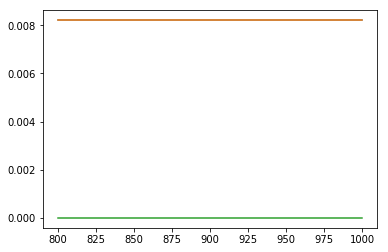

In [14]:
def Gmin_T(T):
    KT = np.exp(DG/8.314/ T * 1000)
    sol = fsolve(Gmin_KT, Gmin_sol, args=KT)
    return sol

Tspan = np.linspace(800, 1000)
xi_sol = list(map(Gmin_T, Tspan))
plt.plot(Tspan, xi_sol)
plt.show()